# Cleaning, Formatting and Analysing Steam data

In [399]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [335]:
# Loading data
steam_data = pd.read_csv('steam.csv')
# game_desc = pd.read_csv('steam_description_data.csv')
# user_data = pd.read_csv('user_data.csv')

## Observing data

In [336]:
steam_data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [337]:
steam_data.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [338]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [339]:
steam_data.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

## Data formatting

In [340]:
steam_data["steamspy_tags"] = steam_data["steamspy_tags"].str.replace(";",",")
steam_data["steamspy_tags"] = steam_data["steamspy_tags"].apply(lambda x: x.split(","))
steam_data["genres"] = steam_data["genres"].str.replace(";",",")
steam_data["genres"] = steam_data["genres"].apply(lambda x: x.split(","))
# steam_data["platforms"] = steam_data["platforms"].str.replace(";",",")
# steam_data["platforms"] = steam_data["platforms"].apply(lambda x: x.split(","))
steam_data["release_date"] = steam_data["release_date"].apply(lambda x: x.split("-")[0])
steam_data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],"[Action, FPS, Multiplayer]",0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],"[Action, FPS, Multiplayer]",0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,[Action],"[FPS, World War II, Multiplayer]",0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],"[Action, FPS, Multiplayer]",0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,[Action],"[FPS, Action, Sci-fi]",0,5250,288,624,415,5000000-10000000,3.99


Since genres will be one of the main features used in clustering the data, they will be hot encoded to their respective columns


In [341]:
# Hot encoding the genres
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

steam_data_encoded = steam_data.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(steam_data.genres),
        index=steam_data.index,
        columns=mlb.classes_
    )
)

genres = mlb.classes_
steam_data_encoded.pop('genres')
steam_data_encoded.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,steamspy_tags,...,Sexual Content,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,10,Counter-Strike,2000,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,"[Action, FPS, Multiplayer]",...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,1999,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,"[Action, FPS, Multiplayer]",...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,2003,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,"[FPS, World War II, Multiplayer]",...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,2001,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,"[Action, FPS, Multiplayer]",...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,"[FPS, Action, Sci-fi]",...,0,0,0,0,0,0,0,0,0,0


In [342]:
steam_data["categories_array"] = steam_data["categories"].str.replace(";",",")
steam_data["categories_array"] = steam_data["categories_array"].apply(lambda x: x.split(","))
mlb2 = MultiLabelBinarizer(sparse_output=True)
categories = pd.DataFrame.sparse.from_spmatrix(
        mlb2.fit_transform(steam_data.categories_array),
        index=steam_data.index,
        columns=mlb2.classes_
    )
mlb2.classes_
# print(steam_data["categories_array"].value_counts())

array(['Captions available', 'Co-op', 'Commentary available',
       'Cross-Platform Multiplayer', 'Full controller support',
       'In-App Purchases', 'Includes Source SDK', 'Includes level editor',
       'Local Co-op', 'Local Multi-Player', 'MMO', 'Mods',
       'Mods (require HL2)', 'Multi-player', 'Online Co-op',
       'Online Multi-Player', 'Partial Controller Support',
       'Shared/Split Screen', 'Single-player', 'Stats',
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications',
       'Steam Workshop', 'SteamVR Collectibles', 'VR Support',
       'Valve Anti-Cheat enabled'], dtype=object)

In [343]:
steam_data_encoded["multiplayer"] = steam_data["categories"].apply(lambda x: 'multiplayer' in x.lower() or 'multi-player' in x.lower())
steam_data_encoded["local"] = steam_data["categories"].apply(lambda x: 'local' in x.lower())
steam_data_encoded["singleplayer"] = steam_data["categories"].apply(lambda x: 'single-player' in x.lower())

## Removing Unecessary Features

In [344]:
# Removing genres that have barely any games in their category
print("Number of genres:", len(genres))
genres_to_delete = []
for genre in genres:
    length_gen = len(steam_data_encoded[steam_data_encoded[genre] > 0])
    # print(genre, length_gen)
    if length_gen <= 30:
        genres_to_delete.append(genre)
    
print(genres_to_delete, len(genres_to_delete))
steam_data_encoded.drop(genres_to_delete, 1, inplace=True)
steam_data_encoded.columns

Number of genres: 29
['Accounting', 'Audio Production', 'Documentary', 'Game Development', 'Photo Editing', 'Tutorial', 'Web Publishing'] 7


Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'Action',
       'Adventure', 'Animation & Modeling', 'Casual', 'Design & Illustration',
       'Early Access', 'Education', 'Free to Play', 'Gore', 'Indie',
       'Massively Multiplayer', 'Nudity', 'RPG', 'Racing', 'Sexual Content',
       'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Violent', 'multiplayer', 'local', 'singleplayer'],
      dtype='object')

Since those genres were dropped, if a game only has those dropped genres, it will be removed from the dataset, since it would not provide much value

In [401]:
# Removing all rows that only have those genres
genres_cleaned = [i for i in genres if i not in genres_to_delete]
len(genres_cleaned)
# remaining = steam_data_encoded[steam_data_encoded[genres_cleaned] == 1]
# remaining

22

In [346]:
popular_non_english = steam_data[steam_data['english'] == 0]
len(popular_non_english)

511

We are now going to check if there is a lot of variance in the required age

In [347]:
steam_data_encoded['required_age'].value_counts()

0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64

Since most games are english, we will discard all non english games for this. Also, since most games don't have a required age anyways, this column will not contribute much and therefore will be removed from the dataset. Some other unnecessary features have also been dropped as well

In [348]:
steam_data_encoded = steam_data_encoded[steam_data_encoded['english'] == 1]
steam_data_encoded.drop('required_age', 1, inplace=True)
steam_data_encoded.drop('english', 1, inplace=True)
steam_data_encoded.drop('achievements', 1, inplace=True)
steam_data_encoded.drop('publisher', 1, inplace=True)
len(steam_data_encoded)

26564

In [349]:
steam_data_encoded.head()

,appid,name,release_date,developer,platforms,categories,steamspy_tags,positive_ratings,negative_ratings,average_playtime,...,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Violent,multiplayer,local,singleplayer
0,10,Counter-Strike,2000,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,"[Action, FPS, Multiplayer]",124534,3339,17612,...,0,0,0,0,0,0,0,True,True,False
1,20,Team Fortress Classic,1999,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,"[Action, FPS, Multiplayer]",3318,633,277,...,0,0,0,0,0,0,0,True,True,False
2,30,Day of Defeat,2003,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,"[FPS, World War II, Multiplayer]",3416,398,187,...,0,0,0,0,0,0,0,True,False,False
3,40,Deathmatch Classic,2001,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,"[Action, FPS, Multiplayer]",1273,267,258,...,0,0,0,0,0,0,0,True,True,False
4,50,Half-Life: Opposing Force,1999,Gearbox Software,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,"[FPS, Action, Sci-fi]",5250,288,624,...,0,0,0,0,0,0,0,True,False,True


In [350]:
ranges = steam_data_encoded["owners"].unique()
ranges

array(['10000000-20000000', '5000000-10000000', '2000000-5000000',
       '20000000-50000000', '100000000-200000000', '50000000-100000000',
       '20000-50000', '500000-1000000', '100000-200000', '50000-100000',
       '1000000-2000000', '200000-500000', '0-20000'], dtype=object)

## Data Analysis

First we will check whether there is a relationship between multiplayer and average rating


In [351]:
print("Multiplayer: ", len(steam_data_encoded[steam_data_encoded['multiplayer'] == True]))
print("Not multiplayer", len(steam_data_encoded[steam_data_encoded['multiplayer'] == False]))
print("Singleplayer", len(steam_data_encoded[steam_data_encoded['singleplayer'] == True]))
print("Not Singleplayer",len(steam_data_encoded[steam_data_encoded['singleplayer'] == False]))
print("local ",len(steam_data_encoded[steam_data_encoded['local'] == True]))
print("Not local",len(steam_data_encoded[steam_data_encoded['local'] == False]))

Multiplayer:  5307
Not multiplayer 21257
Singleplayer 25199
Not Singleplayer 1365
local  1942
Not local 24622


In [352]:
# Converting owwners to numeric value
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("100000000-200000000", "150000000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("50000000-100000000", "75000000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("20000000-50000000", "35000000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("10000000-20000000", "15000000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("5000000-10000000", "7500000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("2000000-5000000", "3500000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("1000000-2000000", "1500000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("500000-1000000", "750000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("200000-500000", "350000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("100000-200000", "150000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("50000-100000", "75000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("20000-50000", "35000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].str.replace("0-20000", "10000")
steam_data_encoded["owners"] = steam_data_encoded["owners"].astype(int)

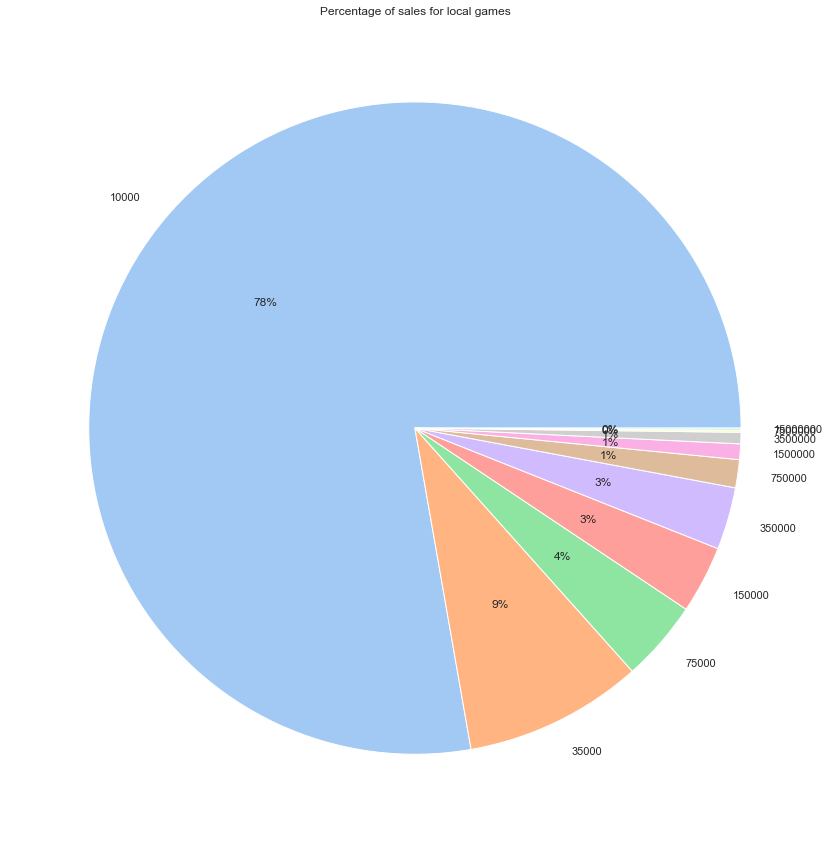

In [353]:
local_only = steam_data_encoded[(steam_data_encoded['local'] == True)]
fig = plt.figure(figsize=(15, 15))

values = local_only.groupby('owners').size().sort_values(ascending=False)
temp = pd.DataFrame(
    {
        "counts": values.values,
        "owners": values.index
    }
)
plt.pie(temp.counts, labels = temp.owners, colors = sns.color_palette('pastel')[0:10], autopct='%.0f%%')
plt.title("Percentage of sales for local games")
plt.show()


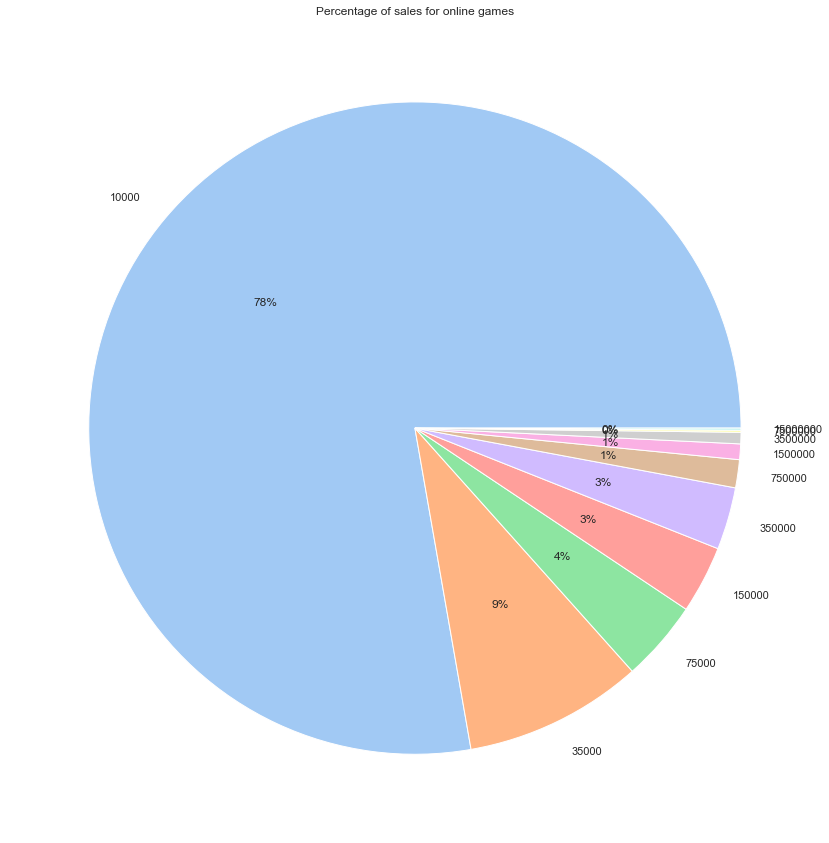

In [354]:
not_local = steam_data_encoded[(steam_data_encoded['local'] == False)]
fig = plt.figure(figsize=(15, 15))

values = local_only.groupby('owners').size().sort_values(ascending=False)
temp = pd.DataFrame(
    {
        "counts": values.values,
        "owners": values.index
    }
)

plt.pie(temp.counts, labels = temp.owners, colors = sns.color_palette('pastel')[0:10], autopct='%.0f%%')
plt.title("Percentage of sales for online games")
plt.show()

5307


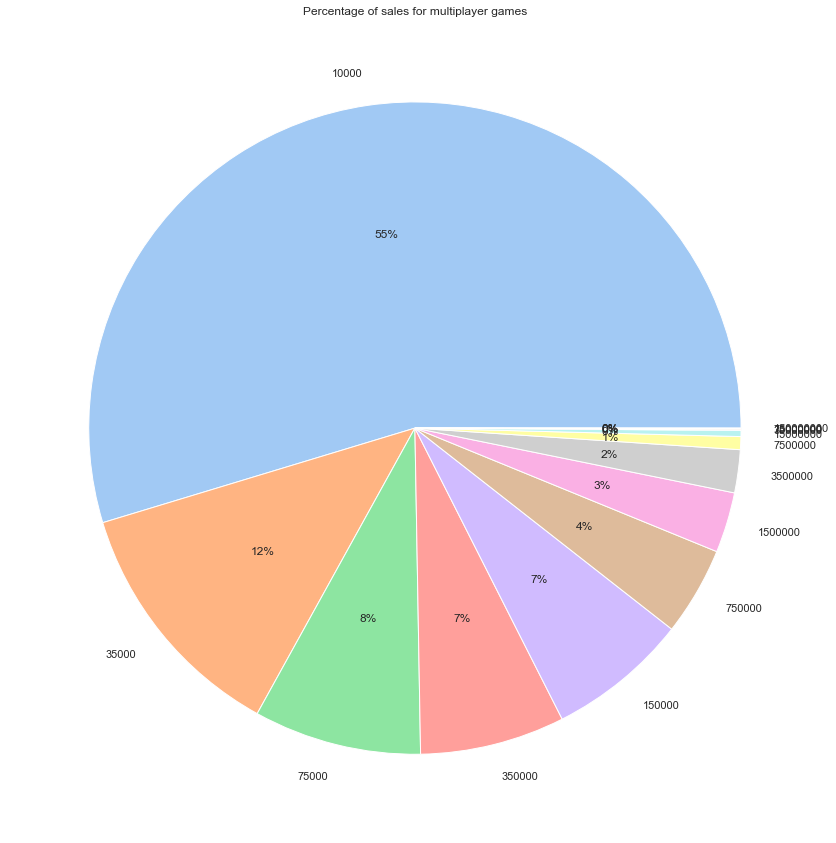

In [355]:
multiplayer = steam_data_encoded[(steam_data_encoded['multiplayer'] == True)]
print(len(multiplayer))
fig = plt.figure(figsize=(15, 15))

values = multiplayer.groupby('owners').size().sort_values(ascending=False)
temp = pd.DataFrame(
    {
        "counts": values.values,
        "owners": values.index
    }
)

plt.pie(temp.counts, labels = temp.owners, colors = sns.color_palette('pastel')[0:10], autopct='%.0f%%')
plt.title("Percentage of sales for multiplayer games")
plt.show()

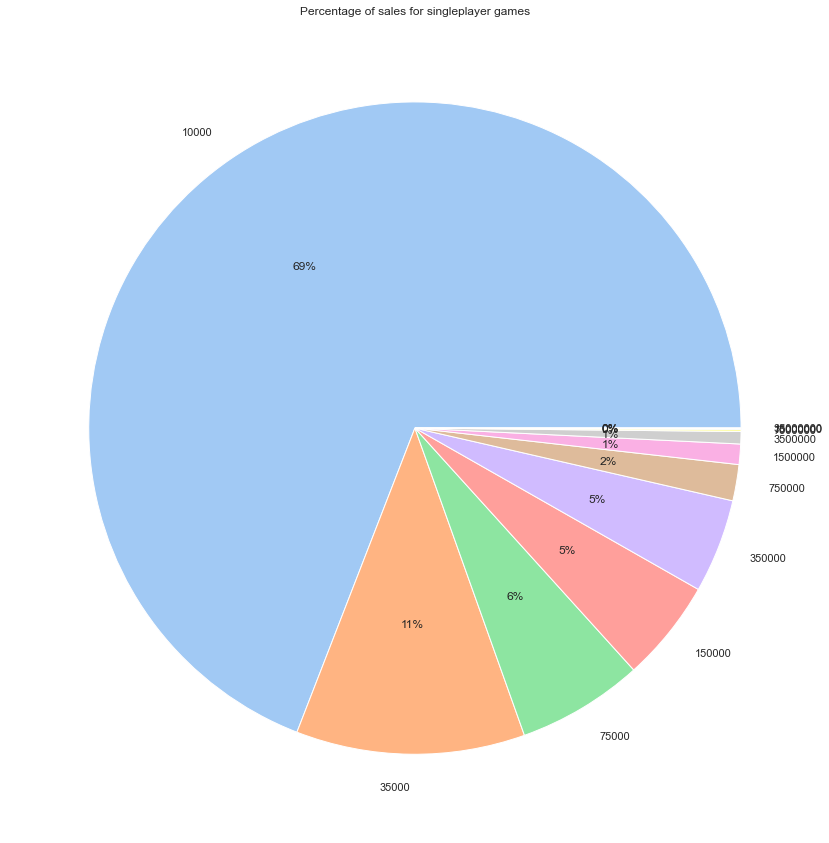

In [356]:
singleplayer = steam_data_encoded[(steam_data_encoded['singleplayer'] == True)]
fig = plt.figure(figsize=(15, 15))

values = singleplayer.groupby('owners').size().sort_values(ascending=False)
temp = pd.DataFrame(
    {
        "counts": values.values,
        "owners": values.index
    }
)

plt.pie(temp.counts, labels = temp.owners, colors = sns.color_palette('pastel')[0:10],autopct='%.0f%%')
plt.title("Percentage of sales for singleplayer games")
plt.show()

## Removing outliers in numeric data

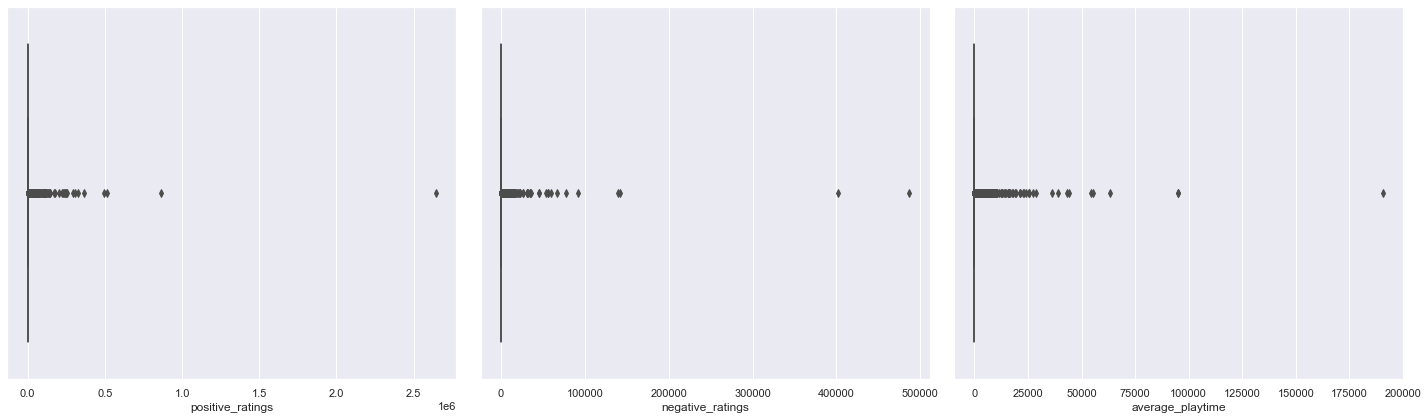

In [379]:
cols = ['positive_ratings', 'negative_ratings', 'average_playtime']

sns.set_style('darkgrid')
f, axes = plt.subplots(1,3, figsize=(20,6))  
i = 0
for name in cols:
    b=sns.boxplot(x=steam_data_encoded[name], ax=axes[i])
    b.set_xlabel(name)
    i = i+1

plt.tight_layout()
plt.show()

we can see that there are some significant outliers in the data, and therefore so as to analyze the data more accurately those outliers will be removed

In [388]:
temp_data = steam_data_encoded
temp_data = temp_data[(temp_data['positive_ratings'] < 1000000) & (temp_data['positive_ratings'] > 200)]
temp_data = temp_data[(temp_data['negative_ratings'] < 1000000) & (temp_data['positive_ratings'] > 200)]
temp_data = temp_data[(temp_data['average_playtime'] < 25000) & (temp_data['positive_ratings'] > 200)]

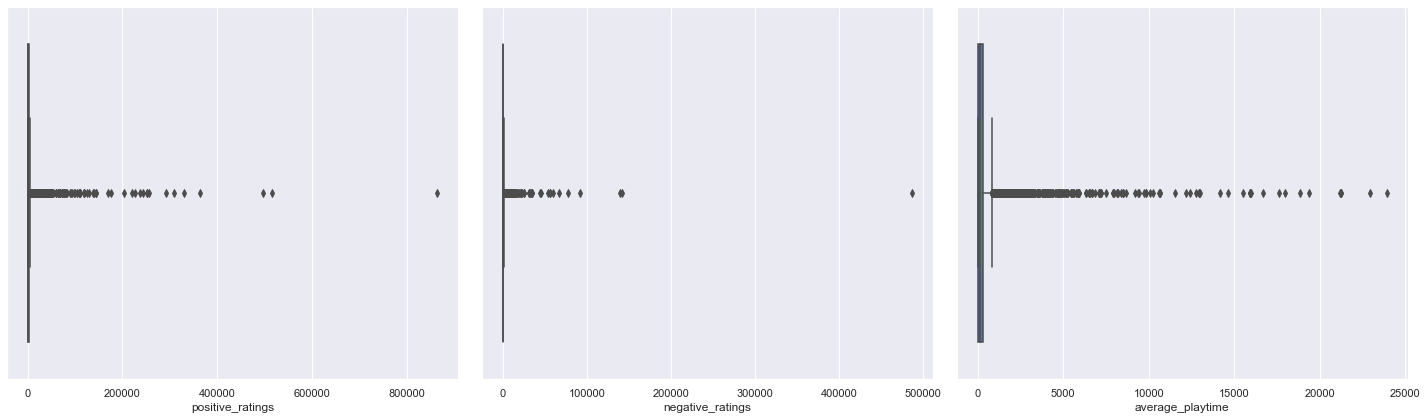

In [389]:
cols = ['positive_ratings', 'negative_ratings', 'average_playtime']

sns.set_style('darkgrid')
f, axes = plt.subplots(1,3, figsize=(20,6))  
i = 0
for name in cols:
    b=sns.boxplot(x=temp_data[name], ax=axes[i])
    b.set_xlabel(name)
    i = i+1

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='owners', ylabel='value'>

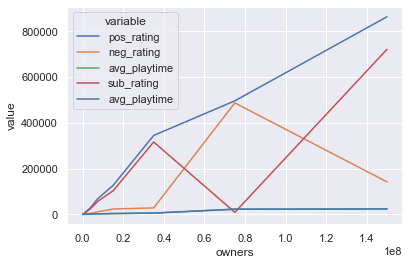

In [395]:
values = temp_data.groupby('owners').mean(
)[['positive_ratings', 'negative_ratings', 'average_playtime']].sort_values(ascending=True, by='owners')
temp = pd.DataFrame(
    {
        "pos_rating": values.values[:, 0],
        "neg_rating": values.values[:, 1],
        "sub_rating": values.values[:, 0] - values.values[:, 1],
        "avg_playtime": values.values[:, 2],
        "owners": values.index
    }
)
sns.lineplot(x="owners", y='value', hue="variable",
             data=pd.melt(temp, id_vars=['owners'], value_vars=["pos_rating", "neg_rating", "avg_playtime", "sub_rating"]))

sns.lineplot(x="owners", y='value', hue="variable",
             data=pd.melt(temp, id_vars=['owners'], value_vars=["avg_playtime"]))
# temp
# values


<AxesSubplot:xlabel='owners', ylabel='value'>

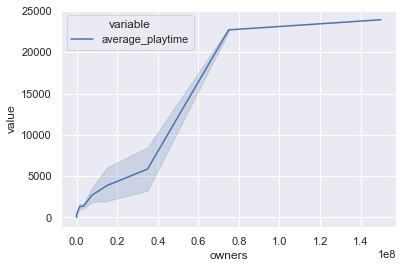

In [397]:
sns.lineplot(x="owners", y='value', hue="variable",
             data=pd.melt(steam_data_encoded, id_vars=['owners'], value_vars=["average_playtime"]))

Although not completely clean, due to the severely biased data, we can see some sort of correlation with positive ratings and average playtime with respect to number of owners of the game, which can show that, the more positive and playtime it gets, the more popular it is.

As for the negative ratings, it looks like there are 3 different types of relationships, where at the start, there aren't a lot of negative ratings for low number of owners, which then drastically increases with more owners then decreased again after a certain value. However, this sharp decrease after 0.75e8 might be due to the outliers in the data

In [404]:
values = temp_data.groupby('owners').size()[genres_cleaned]
values

owners
10000         420
35000         892
75000         856
150000       1004
350000       1067
750000        502
1500000       285
3500000       192
7500000        46
15000000       21
35000000        3
75000000        1
150000000       1
dtype: int64